## Predictions : opposite dataset

In [1]:
### in this version of the preidctions
### I am swapping the datasets, i.e, using the scaled data for the trees and 
### normal data for the distance based models

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### ----------------data loading-------------------

In [2]:
df_distance = pd.read_csv('../data Cleaned/housing_trees.csv')
df_distance.drop('Unnamed: 0', axis = 1, inplace = True)
df_distance.head()

,longitude,latitude,housing_median_age,median_income,median_house_value,ocean_proximity,rooms_per_bedroom,population_per_household,bedroom_per_household,room_per_household
0,-122.23,37.88,41.0,8.3252,452600.0,2,6,2,1,6
1,-122.22,37.86,21.0,8.3014,358500.0,2,6,2,0,6
2,-122.24,37.85,52.0,7.2574,352100.0,2,7,2,1,8
3,-122.25,37.85,52.0,5.6431,341300.0,2,5,2,1,5
4,-122.25,37.85,52.0,3.8462,342200.0,2,5,2,1,6


In [3]:
X_distance = df_distance.drop('median_house_value', axis = 1)
y_distance = df_distance.median_house_value

In [7]:
df_trees = pd.read_csv('../data Cleaned/housing_distance.csv')
df_trees.drop('Unnamed: 0', axis = 1, inplace = True)
df_trees.head()

,longitude,latitude,housing_median_age,median_house_value,ocean_proximity,rooms_per_bedroom,population_per_household,bedroom_per_household,room_per_household,median_income
0,0.211155,0.567481,0.784314,0.902266,2,6,2,1,6,1.000000
1,0.212151,0.565356,0.392157,0.708247,2,6,2,0,6,1.000000
2,0.210159,0.564293,1.000000,0.695051,2,7,2,1,8,0.877586
3,0.209163,0.564293,1.000000,0.672783,2,5,2,1,5,0.667939
4,0.209163,0.564293,1.000000,0.674638,2,5,2,1,6,0.434579


In [8]:
X_trees = df_trees.drop('median_house_value', axis = 1)
y_trees = df_trees.median_house_value

### ---------------loading the scaler--------------------------

In [11]:
import joblib
scaler = joblib.load('../scalers/scaler_for_target.pkl')

### ----------------------train test split---------------------

In [12]:
from sklearn.model_selection import train_test_split
X_train_trees, X_test_trees, y_train_trees, y_test_trees = train_test_split(X_trees, y_trees, random_state = 42, test_size = 0.30)

In [13]:
X_train_distance, X_test_distance, y_train_distance, y_test_distance = train_test_split(X_distance, y_distance, random_state = 42, test_size = 0.30)

In [14]:
print(f"{X_train_distance.shape} : {y_train_distance.shape} :: {X_test_distance.shape}: {y_test_distance.shape}")

(14448, 9) : (14448,) :: (6192, 9): (6192,)


In [16]:
print(f"{X_train_trees.shape} : {y_train_trees.shape} :: {X_test_trees.shape} : {y_test_trees.shape}")

(14448, 9) : (14448,) :: (6192, 9) : (6192,)


### -------------writing the functions----------------

In [17]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, root_mean_squared_error

In [18]:
def metrics(y_test, y_pred) : 
    print(f"r2_score : {r2_score(y_test, y_pred)}")
    print(f"mean_absolute_error : {mean_absolute_error(y_test, y_pred)}")
    print(f"root_mean_squared_error : {root_mean_squared_error(y_test, y_pred)}")
    print(f"mean_squared_error : {mean_squared_error(y_test, y_pred)}")

In [19]:
def plot(y_test, y_pred) : 
    plt.figure(figsize = (10, 6))
    plt.subplot(1, 2, 1)
    plt.scatter(y_test, y_pred, color = 'blue', alpha = 0.5, label = 'predicted')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color = 'red', linewidth = 2, label = 'Perfect Prediction Line')
    plt.xlabel('Actual Values(y_test)')
    plt.ylabel('Predicted Values(y_pred)')
    plt.legend()
    plt.grid()

    plt.subplot(1, 2, 2)
    plt.subplot(1, 2, 2)
    plt.plot(y_test, label='Actual', color='blue', marker='o')
    plt.plot(y_pred, label='Predicted', color='red', marker='x')
    plt.xlabel('Index')
    plt.ylabel('Target Value')
    plt.legend()
    plt.grid(True)
    plt.show()


In [20]:
def pred_and_plot_distance(X_train, y_train, X_test, y_test, model) : 
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    metrics(y_pred, y_test)
    plot(y_pred, y_test)

In [21]:
def plot_and_pred_trees(X_train, y_train, X_test, y_test, model) : 
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_test = scaler.inverse_transform(np.array(y_test).reshape(-1, 1))
    y_pred = scaler.inverse_transform(np.array(y_pred).reshape(-1, 1))
    metrics(y_pred, y_test)
    plot(y_pred, y_test) 

## ------------------Models------------------------

### ------------Distance based models----------------

### 1. Linear Regression

r2_score : 0.3559360129629727
mean_absolute_error : 52838.02104589945
root_mean_squared_error : 73438.11200979023
mean_squared_error : 5393156295.562497


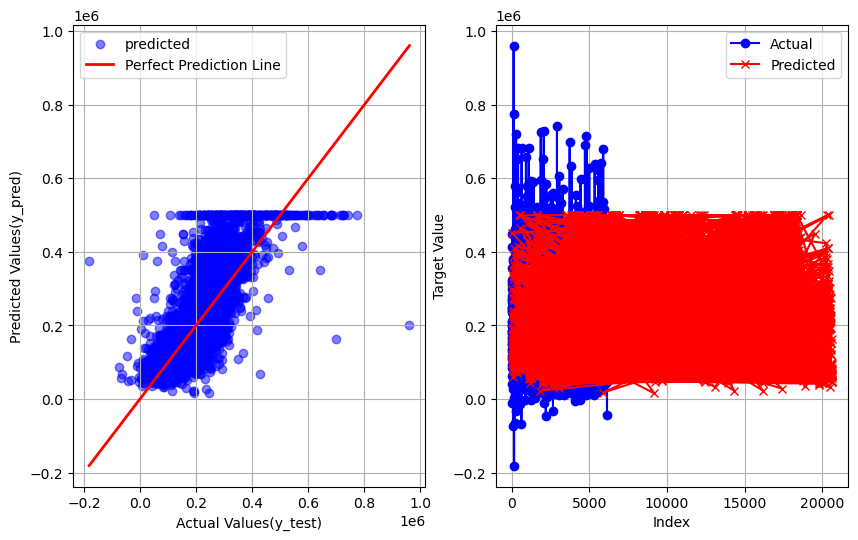

In [22]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
pred_and_plot_distance(X_train_distance, y_train_distance, X_test_distance, y_test_distance, model = lr)

### 2. SVR

r2_score : -40314492.86177022
mean_absolute_error : 87929.4670165661
root_mean_squared_error : 117799.26289046017
mean_squared_error : 13876666337.535748


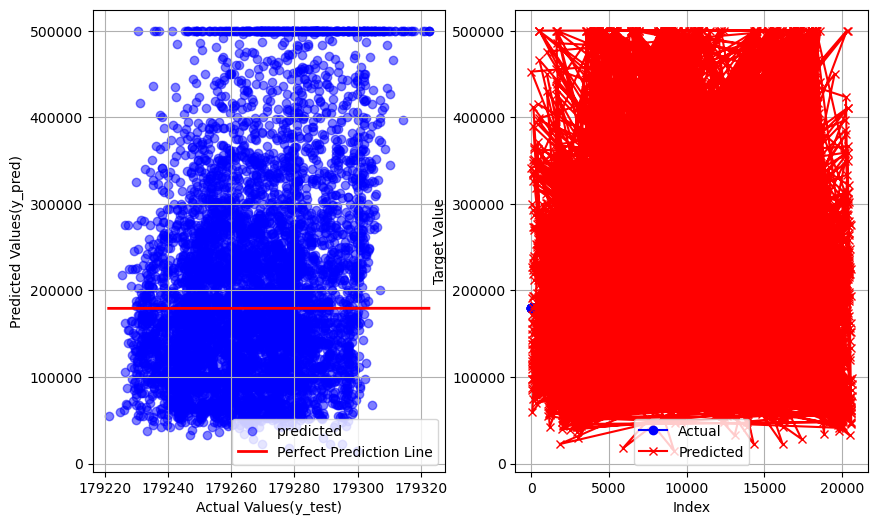

In [25]:
from sklearn.svm import SVR
svr = SVR()
pred_and_plot_distance(X_train_distance, y_train_distance, X_test_distance, y_test_distance, model = svr)

### 3. KNN

r2_score : 0.5884149768891674
mean_absolute_error : 42860.51401808785
root_mean_squared_error : 62980.90790809215
mean_squared_error : 3966594760.927584


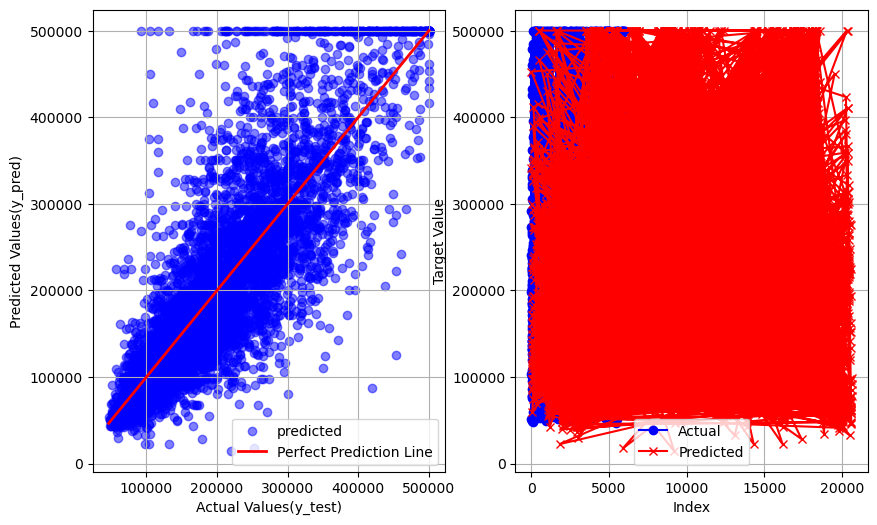

In [26]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor()
pred_and_plot_distance(X_train_distance, y_train_distance, X_test_distance, y_test_distance, model = knn)

### ---------Probablity based algo-----------
### Gausian NB

In [29]:
### NB always need the data in the same form as it is, without the scaling

r2_score : 0.26755565067832754
mean_absolute_error : 70636.20655684755
root_mean_squared_error : 98111.27370368899
mean_squared_error : 9625822027.760174


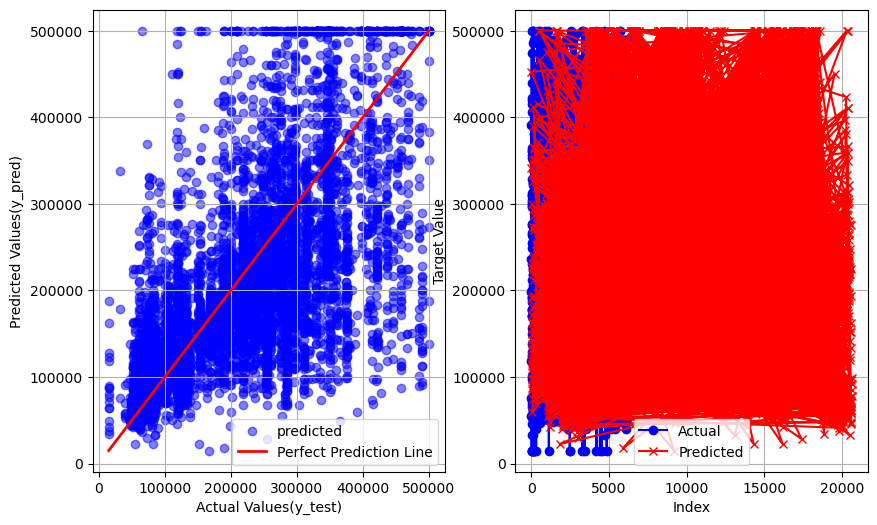

In [28]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
pred_and_plot_distance(X_train_distance, y_train_distance, X_test_distance, y_test_distance, model = gnb)

### --------------Tree based models-------------

### 1. Decision Treee

r2_score : 0.6624676747495832
mean_absolute_error : 41795.68071705427
root_mean_squared_error : 67006.38385146574
mean_squared_error : 4489855476.849968


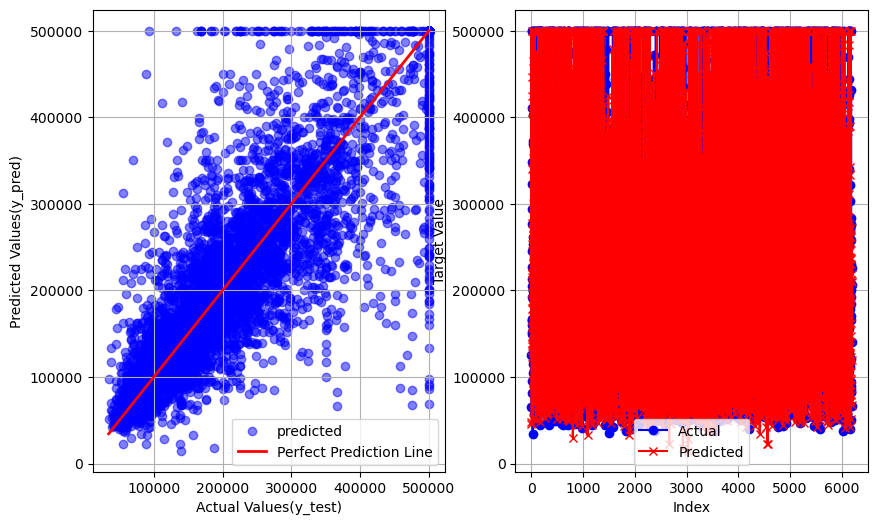

In [30]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()
plot_and_pred_trees(X_train_trees, y_train_trees, X_test_trees, y_test_trees, model = dtr)

### 2. Random Forest Regressor

r2_score : 0.7778701710573246
mean_absolute_error : 31377.06202196382
root_mean_squared_error : 48892.42904419067
mean_squared_error : 2390469617.8412194


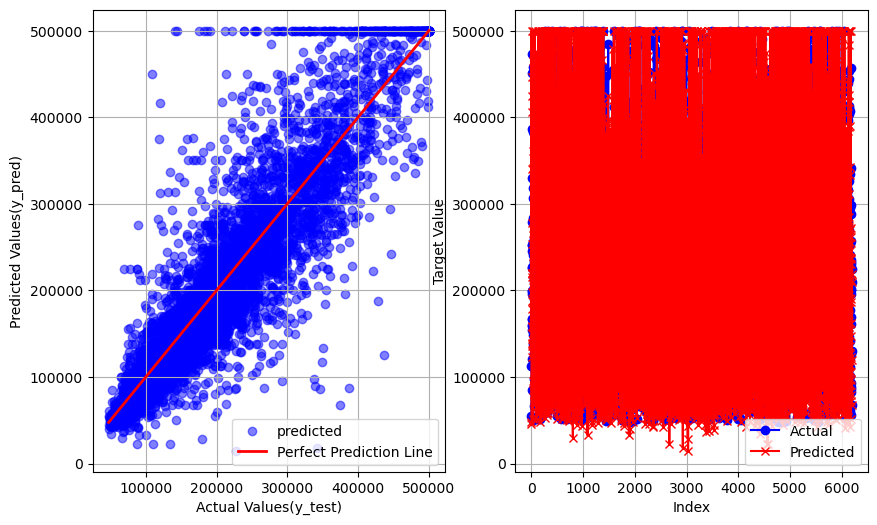

In [31]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
plot_and_pred_trees(X_train_trees, y_train_trees, X_test_trees, y_test_trees, model = rfr)

### 3. Adaboost

r2_score : -0.03773480590796119
mean_absolute_error : 64637.05874231369
root_mean_squared_error : 77831.1399634673
mean_squared_error : 6057686348.0128355


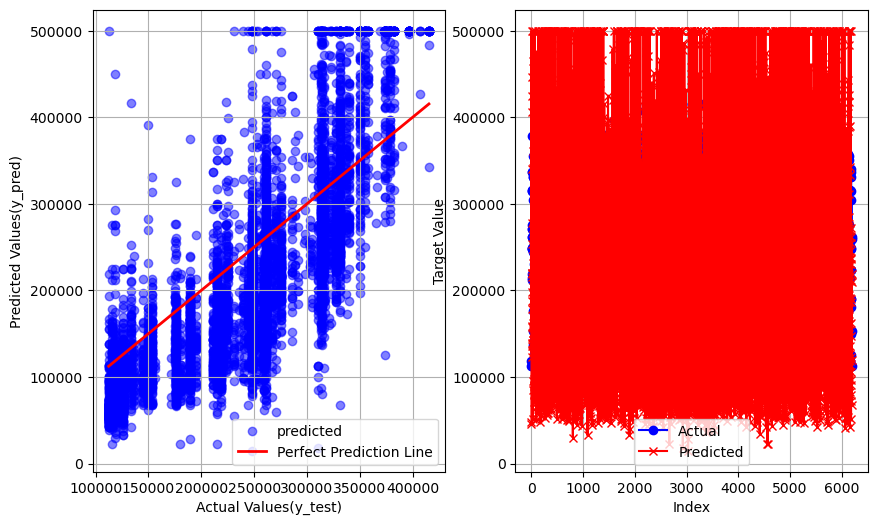

In [32]:
from sklearn.ensemble import AdaBoostRegressor
abr = AdaBoostRegressor()
plot_and_pred_trees(X_train_trees, y_train_trees, X_test_trees, y_test_trees, model = abr)

### 4. Gradient boost

r2_score : 0.6990427716661751
mean_absolute_error : 37823.28012990093
root_mean_squared_error : 54641.14118848144
mean_squared_error : 2985654310.379563


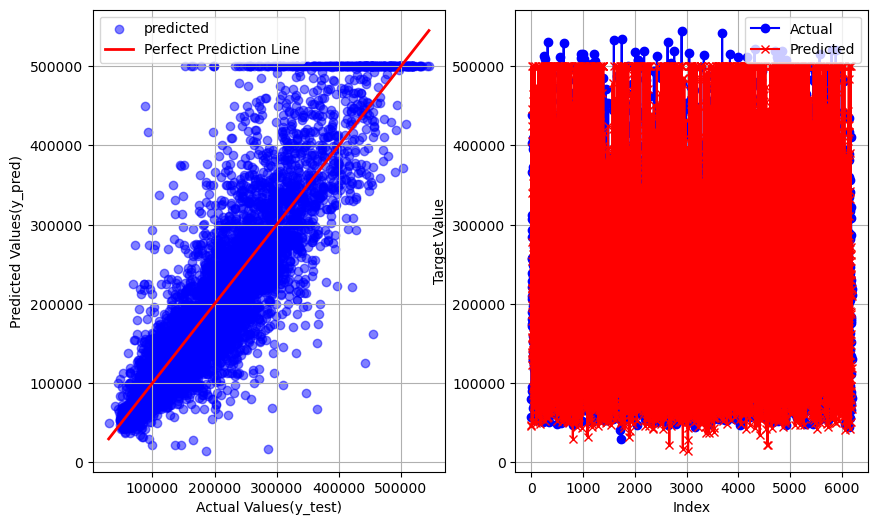

In [33]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor()
plot_and_pred_trees(X_train_trees, y_train_trees, X_test_trees, y_test_trees, model = gbr)

### ----------------DL : ANN-----------------------

In [36]:
import keras
from keras.layers import Dense, Dropout
from keras.models import Sequential

In [44]:
model = Sequential()

In [46]:
model.add(Dense(128, activation = 'relu', kernel_initializer = 'he_uniform', input_dim = X_train_trees.shape[1]))
model.add(Dense(256, activation = 'elu', kernel_initializer = 'he_uniform'))
model.add(Dropout(0.30))
model.add(Dense(256, activation = 'relu', kernel_initializer = 'he_normal'))
model.add(Dropout(0.30))
model.add(Dense(256, activation = 'relu', kernel_initializer = 'he_uniform'))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(1))
model.compile(optimizer = 'adam', loss = 'MAE', metrics = ['mae'])

In [47]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 128)            │         1,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 256)            │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 198,913 (777.00 KB)

 Trainable params: 198,913 (777.00 KB)

 Non-trainable params: 0 (0.00 B)

In [48]:
model.fit(X_train_distance, y_train_distance, batch_size = 128, epochs = 30, validation_split = 0.10)

Epoch 1/30
102/102 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 154275.3594 - mae: 154275.3594 - val_loss: 87895.6875 - val_mae: 87895.6875
Epoch 2/30
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 88191.5469 - mae: 88191.5469 - val_loss: 85979.3594 - val_mae: 85979.3594
Epoch 3/30
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 86456.2344 - mae: 86456.2344 - val_loss: 80300.6094 - val_mae: 80300.6094
Epoch 4/30
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 75913.7344 - mae: 75913.7344 - val_loss: 58968.0703 - val_mae: 58968.0703
Epoch 5/30
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 61181.2109 - mae: 61181.2109 - val_loss: 56893.5156 - val_mae: 56893.5156
Epoch 6/30
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 57248.7852 - mae: 57248.7852 - val_loss: 53757.1875 - val_mae: 53757.1875
Epoch 7/30
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 55251.7344 - mae: 55251.7344 - val_loss: 53283.7773 - val_mae: 53283.7773
Epoch 8/30
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 

In [49]:
y_pred_ann = model.predict(X_test_distance)

194/194 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


r2_score : 0.6448958574590412
mean_absolute_error : 47085.24364982033
root_mean_squared_error : 68270.66936363371
mean_squared_error : 4660884295.358595


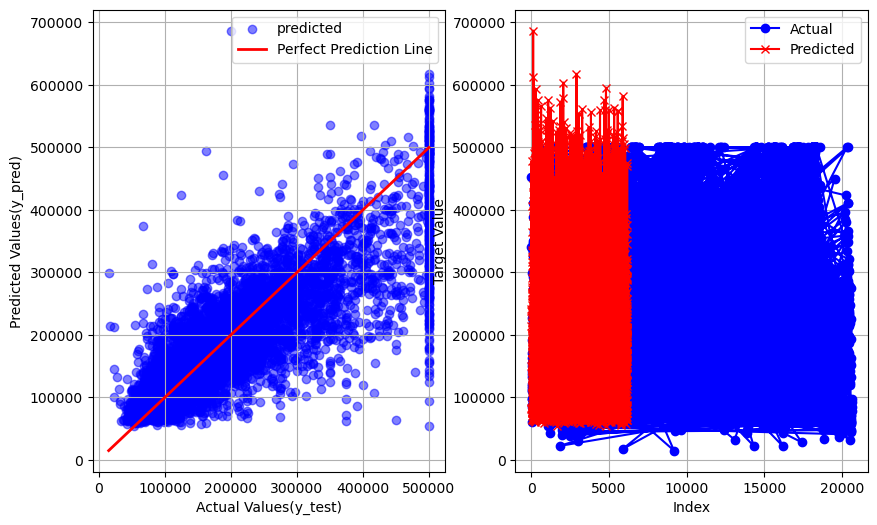

In [52]:
metrics(y_test_distance, y_pred_ann)
plot(y_test_distance, y_pred_ann)